In [2]:
!pip install tensorflow

                                              0.0/284.2 MB ? eta -:--:--
                                              0.0/284.2 MB ? eta -:--:--
                                            0.0/284.2 MB 435.7 kB/s eta 0:10:53
                                            0.0/284.2 MB 435.7 kB/s eta 0:10:53
                                            0.1/284.2 MB 326.1 kB/s eta 0:14:32
                                            0.1/284.2 MB 401.6 kB/s eta 0:11:48
                                            0.1/284.2 MB 401.6 kB/s eta 0:11:48
                                            0.1/284.2 MB 379.3 kB/s eta 0:12:29
                                            0.2/284.2 MB 535.8 kB/s eta 0:08:51
                                            0.2/284.2 MB 518.8 kB/s eta 0:09:08
                                            0.2/284.2 MB 528.4 kB/s eta 0:08:58
                                            0.3/284.2 MB 570.1 kB/s eta 0:08:19
                                            0.3/284.2 

     ----------                            82.4/284.2 MB 233.1 kB/s eta 0:14:26
     ----------                            82.4/284.2 MB 234.2 kB/s eta 0:14:22
     ----------                            82.4/284.2 MB 234.2 kB/s eta 0:14:22
     ----------                            82.4/284.2 MB 234.2 kB/s eta 0:14:22
     ----------                            82.4/284.2 MB 234.2 kB/s eta 0:14:22
     ----------                            82.4/284.2 MB 234.2 kB/s eta 0:14:22
     ----------                            82.4/284.2 MB 234.5 kB/s eta 0:14:21
     ----------                            82.4/284.2 MB 234.5 kB/s eta 0:14:21
     ----------                            82.4/284.2 MB 234.5 kB/s eta 0:14:21
     ----------                            82.4/284.2 MB 234.5 kB/s eta 0:14:21
     ----------                            82.4/284.2 MB 233.1 kB/s eta 0:14:26
     ----------                            82.5/284.2 MB 235.3 kB/s eta 0:14:18
     ----------                         

In [1]:
!pip install Keras

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
#set warnings off

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
IMAGE_SIZE1 = 2100
IMAGE_SIZE2 = 1574
BATCH_SIZE = 32 #32 for batch size is the standard
CHANNEL = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "cancer",
    shuffle = True,
    image_size = (IMAGE_SIZE1, IMAGE_SIZE2), # Image_size is the size of the image
    batch_size = BATCH_SIZE #is the defualt size
)

Found 906 files belonging to 3 classes.


In [5]:
#showing the class name in the files
class_names = dataset.class_names
class_names

['BC_IDC_Grade_1', 'BC_IDC_Grade_2', 'BC_IDC_Grade_3']

In [6]:
len(dataset)

29

In [6]:
# Data Exploration

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) # label must be in numpy
    

(32, 2100, 1574, 3)
[1 1 0 0 2 2 1 2 0 1 2 1 2 2 2 0 2 1 1 1 0 1 0 1 0 2 2 2 2 1 2 0]


In [8]:
# 3 means RGB channels in the dataset
#32 means there are 32 images,
#256, 256 means each images is 256 by 256
#0,1,2, is the label given to 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
# the result is a tensor, t is converted to numpy in the cell below

tf.Tensor(
[[[ 95.  89.  91.]
  [ 88.  82.  84.]
  [ 87.  81.  83.]
  ...
  [149. 143. 145.]
  [148. 142. 144.]
  [147. 141. 143.]]

 [[ 90.  84.  86.]
  [ 87.  81.  83.]
  [ 87.  81.  83.]
  ...
  [148. 142. 144.]
  [147. 141. 143.]
  [147. 141. 143.]]

 [[ 84.  78.  80.]
  [ 85.  79.  81.]
  [ 87.  81.  83.]
  ...
  [146. 140. 142.]
  [146. 140. 142.]
  [147. 141. 143.]]

 ...

 [[137. 132. 138.]
  [132. 127. 133.]
  [129. 124. 130.]
  ...
  [174. 172. 177.]
  [172. 170. 175.]
  [169. 167. 172.]]

 [[129. 124. 130.]
  [134. 129. 135.]
  [135. 130. 136.]
  ...
  [172. 170. 175.]
  [169. 167. 172.]
  [165. 163. 168.]]

 [[130. 125. 131.]
  [140. 135. 141.]
  [144. 139. 145.]
  ...
  [174. 172. 177.]
  [172. 170. 175.]
  [168. 166. 171.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[151. 153. 174.]
  [144. 146. 167.]
  [151. 153. 174.]
  ...
  [101. 102. 122.]
  [ 85.  86. 106.]
  [ 91.  92. 112.]]

 [[137. 139. 160.]
  [138. 140. 161.]
  [145. 147. 168.]
  ...
  [125. 126. 146.]
  [113. 114. 134.]
  [144. 145. 165.]]

 [[133. 135. 156.]
  [140. 142. 163.]
  [140. 142. 163.]
  ...
  [112. 113. 133.]
  [ 96.  97. 117.]
  [122. 123. 143.]]

 ...

 [[193. 195. 207.]
  [171. 173. 185.]
  [180. 182. 194.]
  ...
  [127. 129. 141.]
  [150. 154. 165.]
  [191. 195. 206.]]

 [[169. 171. 183.]
  [182. 184. 196.]
  [210. 212. 224.]
  ...
  [121. 125. 136.]
  [128. 132. 143.]
  [120. 124. 135.]]

 [[176. 178. 190.]
  [156. 158. 170.]
  [185. 187. 199.]
  ...
  [135. 139. 150.]
  [148. 152. 163.]
  [118. 122. 133.]]]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(2100, 1574, 3)


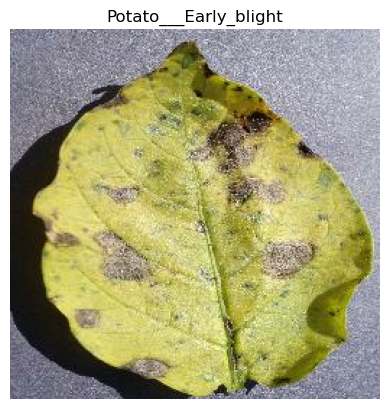

In [12]:
#visualizing the imageing
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

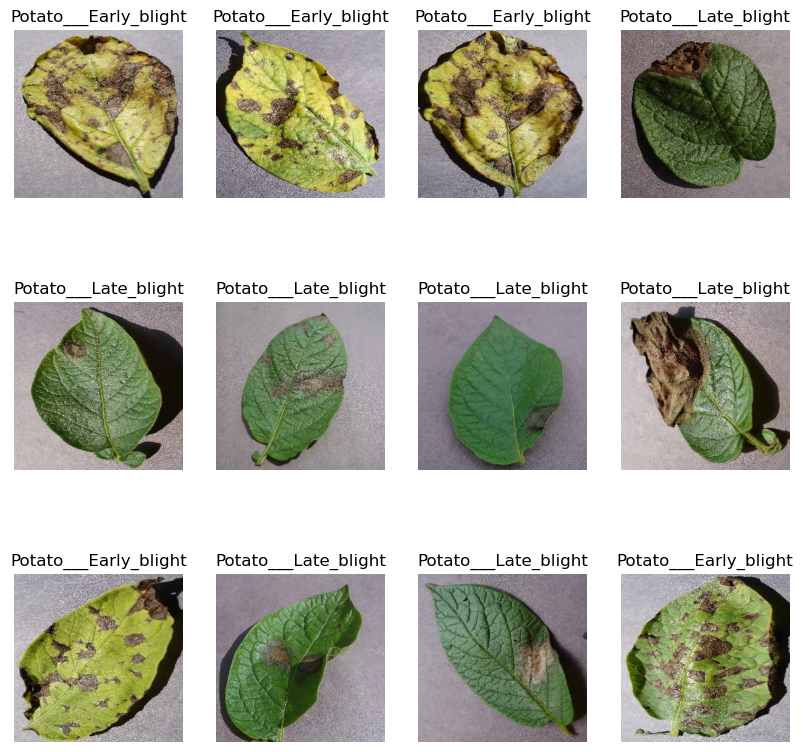

In [13]:
#visualizing the imageing
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [14]:
#training the dataset into train_test_split

In [15]:
# 80% ==>training set
# 20% is test set
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [16]:
train_ds = dataset.take(54)
len(train_ds)

54

In [17]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
# Converting the above to function
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
#shuffling the dataset
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
#resizing the dataset
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [30]:
#data augumentation to make the data roboust
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
layers.Conv2D

In [35]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
   
])

model.build(input_shape = input_shape)

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer — let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)